In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy import signal

from f0detectionyin_gabi import f0detectionyin
from sinemodel import sinemodel
from harmonicmodel_gabi import harmonicmodel
from hpsmodelparams_gabi import hpsmodelparams_gabi
from hpsmodelparams_timbre_gabi import hpsmodelparams_timbre_gabi

In [2]:
filename = 'violin-B3'
DAFx_in, fs = sf.read(f'audios/{filename}.wav')

In [3]:
N = 1024
t = -60
nH = 20
minf0 = 10
maxf0 = 4096
f0et = 5
maxhd = 2
stocf = 10
fscale = 2
timbremapping_inp = np.array([0, 4000, fs/2])
timebremapping_out = np.array([0, 5000, fs/2])
timbremapping = np.vstack((timbremapping_inp,timebremapping_out))
window = signal.windows.hann(N, sym=False)

In [4]:
# DAFx_out_sinemodel = sinemodel(DAFx_in, window, N, t)
# sf.write(f'audios/{filename}_sinemodel.wav', DAFx_out_sinemodel, fs)

In [5]:
# plt.figure(figsize=(10, 6))
# # plt.subplot(121)
# plt.plot(DAFx_in)
# # plt.subplot(122)
# plt.plot(DAFx_out_sinemodel)
# plt.tight_layout()

In [6]:
DAFx_out_harmonicmodel = harmonicmodel(DAFx_in, fs, window, N, t, nH, minf0, maxf0, f0et, maxhd)
sf.write(f'audios/{filename}_harmonicmodel.wav', DAFx_out_harmonicmodel, fs)

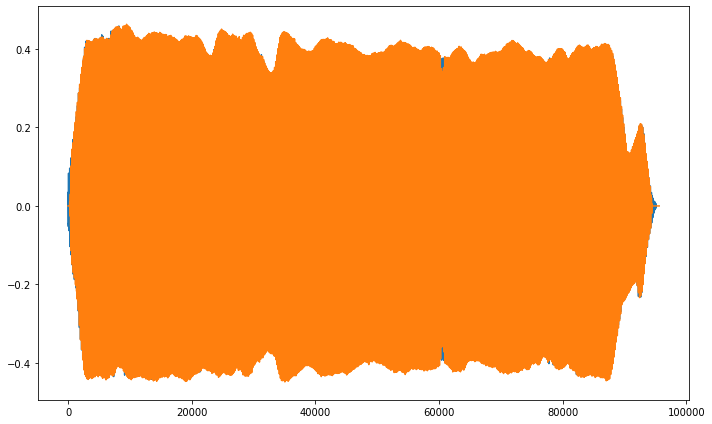

In [7]:
plt.figure(figsize=(10, 6))
# plt.subplot(121)
plt.plot(DAFx_in)
# plt.subplot(122)
plt.plot(DAFx_out_harmonicmodel)
plt.tight_layout()

In [8]:
DAFx_out_hpsmodelparams_timbre, yh, ys = hpsmodelparams_timbre_gabi(
    DAFx_in,
    fs,
    window,
    N,
    t,
    nH,
    minf0,
    maxf0,
    f0et,
    maxhd,
    stocf,
    fscale,
    timbremapping
)
sf.write(f'audios/{filename}_hpsmodelparams.wav', DAFx_out_hpsmodelparams_timbre, fs)

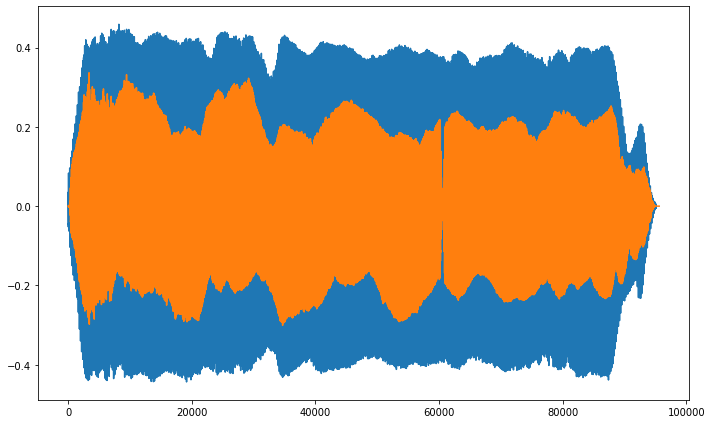

In [9]:
plt.figure(figsize=(10, 6))
# plt.subplot(121)
plt.plot(DAFx_in)
# plt.subplot(122)
plt.plot(DAFx_out_hpsmodelparams_timbre)
plt.tight_layout()